Import libraries and data
---
For this task, import the pandas, numpy, matploblib, and seaborn libraries. Then, load the CSV file "customer satisfaction.csv" and print the first 5 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


Create dummy variables for the categorical variables
---
Use the info function to see the data set information: null values, variable types, and length. If there are categorical variables, transform them into dummy variables.

In [2]:
data = pd.read_csv('customer satisfaction.csv')
data.head()

,id,gender,age,lifecycle,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,satisfaction
0,1334268,Female,55,Returning,3,3,4,3,3,1,4,1,2,3,1,1,Neutral or Dissatisfied
1,25807,Female,39,First-time,1,1,4,1,3,2,3,1,5,5,2,1,Neutral or Dissatisfied
2,8091466,Female,56,Returning,2,2,2,3,3,2,3,2,2,5,2,2,Neutral or Dissatisfied
3,6008938,Female,64,Returning,4,3,5,5,3,4,4,3,3,4,4,3,Neutral or Dissatisfied
4,3030096,Male,59,Returning,5,3,1,5,4,1,1,3,2,5,1,3,Neutral or Dissatisfied


Compute summary statistics and compare averages for satisfied vs. non-satisfied
---
Apply the describe function to extract the summary statistics. Take note of possible outliers. Next, compare the averages for each variable grouped by satisfied and non-satisfied. Specify which variables have the highest deltas from one group to the other.

In [3]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    5000 non-null   int64 
 1   gender                5000 non-null   object
 2   age                   5000 non-null   int64 
 3   lifecycle             5000 non-null   object
 4   delivery_options      5000 non-null   int64 
 5   online_ordering_flow  5000 non-null   int64 
 6   chocolate_quality     5000 non-null   int64 
 7   chocolate_variety     5000 non-null   int64 
 8   chocolate_uniqueness  5000 non-null   int64 
 9   innovation            5000 non-null   int64 
 10  inspiration           5000 non-null   int64 
 11  payment_options       5000 non-null   int64 
 12  price_fairness        5000 non-null   int64 
 13  price_variety         5000 non-null   int64 
 14  price_comparison      5000 non-null   int64 
 15  packaging             5000 non-null   

In [4]:
data = pd.get_dummies(data, drop_first=True)

In [5]:
data.describe();
data.head()

,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,gender_Male,lifecycle_Returning,satisfaction_Satisfied
0,1334268,55,3,3,4,3,3,1,4,1,2,3,1,1,0,1,0
1,25807,39,1,1,4,1,3,2,3,1,5,5,2,1,0,0,0
2,8091466,56,2,2,2,3,3,2,3,2,2,5,2,2,0,1,0
3,6008938,64,4,3,5,5,3,4,4,3,3,4,4,3,0,1,0
4,3030096,59,5,3,1,5,4,1,1,3,2,5,1,3,1,1,0


In [6]:
data.groupby(['satisfaction_Satisfied']).mean()

,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,gender_Male,lifecycle_Returning
satisfaction_Satisfied,,,,,,,,,,,,,,,,
0,5.028717e+06,37.669501,3.110521,2.539497,3.064825,2.662416,3.007439,3.024796,3.066950,2.996103,2.976266,3.003542,3.405597,2.394970,0.493801,0.747432
1,5.119232e+06,41.679375,2.979329,3.054203,3.636197,4.002297,2.943960,3.855765,3.931557,3.826367,3.744143,3.481856,3.988516,3.185117,0.508957,0.900322


Isolate X and Y and visualize a correlation matrix with a heatmap
---
Create X and y objects that have independent and dependent variables, respectively. Build a correlation matrix with the newly created X data frame. Visualize it using a heatmap and set the size of the chart to (10,6). Customize the following parameters:

* annot.
* fmt.
* center.
* cmap.
* linewitdths.
* linecolor.

In [ ]:
X = data.drop(['satisfaction_Satisfied'], axis=1)
y = data.satisfaction_Satisfied

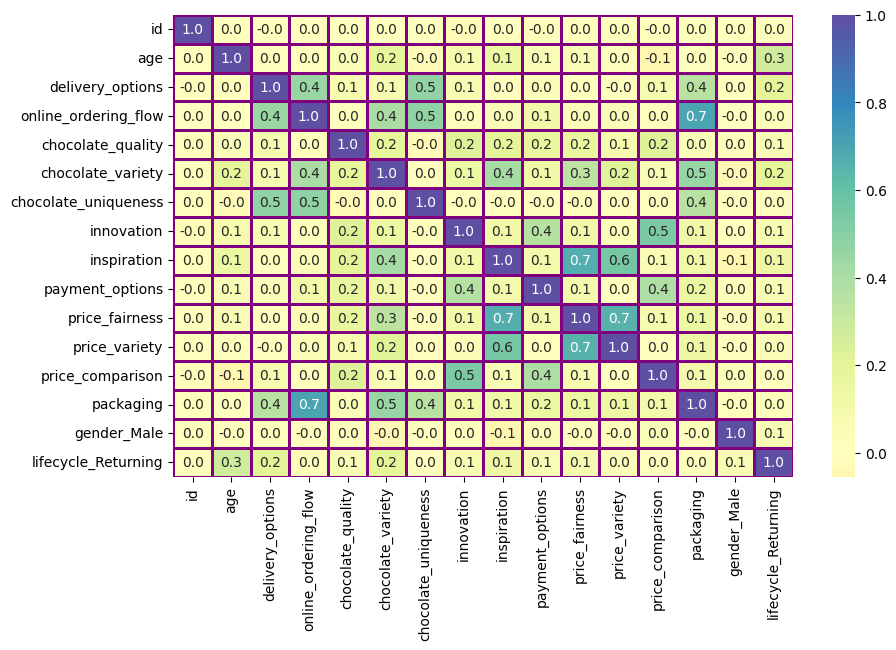

In [ ]:
# Correlation heatmap
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Correlation heatmap
sns.heatmap(data = X.corr(),
            #annot will include the correlation values in the chart
            annot = True,
            #to specify the decimal cases format
            fmt = '.1f',
            #to include a middle point in the color map
            center = 0,
            #Specify which color gradient map to include
            cmap = 'Spectral',
            #Specify the width of the lines between the heatmap rectangules
            linewidths = 1,
            #Specify the color of the lines between rectangules
            linecolor = 'purple',
            #include the figsize specified initially
            ax = ax)
plt.show()

Split data into training and test set and build a baseline model
---
Use the train_test_split function to allocate 20% of the data to the test set. Use the stratification option to ensure a correct split and set a random_state to 1502. To finish this task, build a random forest classification model with 100 trees and a random_state also set to 1502.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502, stratify=y)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=1502)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1502)

Assess the model
---
In this task, you will assess the model. Apply the model to make predictions. Compare them with the test set values and use the accuracy_score function to compute the overall model accuracy.

In [11]:
predictions = model.predict(X_test)
predictions[:5]

print(accuracy_score(y_test, predictions))

Prepare parameter tuning grid
---
Check which parameters are in the baseline model. Build a grid, in the form of a Python dictionary, to tune the following parameters: n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features. Each parameter should have 2 options: one from the baseline mode and another possibility.

In [13]:
# Looking at the random forest params
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1502,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

Implement cross-validation and parameter tuning
---
In this task, you will implement parameter tuning and cross-validation for the random forest model. Start by importing the function GridSearchCV to perform cross-validation through the parameter grid. Next, build a baseline model, called base_model, setting the random_state equal to 1502 inside the Random Forest Classifier. Finally, use the GridSearchCV, setting the following optional parameters:

* 3 folds as the cross-validation parameter.
* n_jobs as  -1.
* verbose equal to 1.

Print the best parameters and score once finished.

In [15]:
# Create a random forest classifier object
base_model = RandomForestClassifier(random_state = 1502)

# Create a grid search object
grid_search = GridSearchCV(base_model, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=1)
 
# Fit the grid search object to the data
grid_search.fit(X, y)

In [17]:
# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9207991534946313
